# covering:
### vision datasets
### architecture of CNN
### end to end multiclass image classification problem
###Modeling CNN

### what are inputs&outputs
- input-> image(batch size, height, width, color channels), then convert to numbers
- output-> numberic outputs, converted to classification/labelled output

### what are CNN(convolutional neural network)
-  type of deep learning neural network designed to process and analyze structured grid data, such as images, audio, and time-series signals

hyperparameters:
1. input image
2. input layer
3. convolution layer
4. hidden activation/non-linear activation
5. pooling layer
6. output layer
7. output activation

###computer vision libraries
- torchvision
- torchvision.datasets
- torchvision.models-> get pretrained computer vision models that you can leveragre for your own problem
- torchvision.transforms-> functions for manipulating vision data(images) to be suitable for use with ml models
- torch.utils.data.Dataset- create your own dataset with custom data
- torch.utils.data.Dataloader-> creates python iterable over dataset


In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


- dataset that will be used is FashionMNIST from torchvision.Datasets

In [2]:
#get dataset
train_data=datasets.FashionMNIST(
    root="data",#where to download data to
    train=True,#train version of dataset, if false then will get test
    download=True,
    transform=ToTensor(),#how to transform data
    target_transform=None #how to transform labels
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 342kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 6.23MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.7MB/s]


In [3]:
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [6]:
image.shape
#color channels, height, width
#1 color channel-> gray scale

torch.Size([1, 28, 28])

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

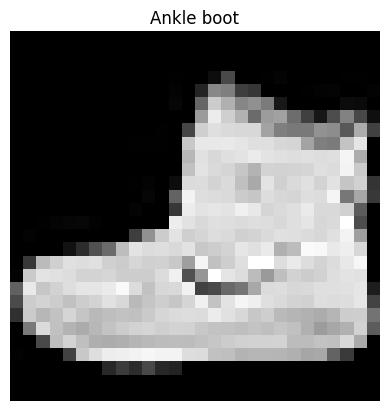

In [7]:
#visualize
plt.imshow(image.squeeze(),cmap="gray")
plt.title(train_data.classes[label])
plt.axis(False)

Linear or nonlinear??


In [8]:
#prepare data, turn data into batches(mini-batches)


why turn to batches?
- more computationally efficient
- give neural network more chances to update its gradient per epoch(update every mini-batch rather than after all data)
- Any model trained by backpropagation or stochastic gradient descent (SGD) benefits from batching

In [9]:
#divide to batches
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader=DataLoader(train_data,batch_size=BATCH_SIZE, shuffle=True)
test_dataloader=DataLoader(test_data,batch_size=BATCH_SIZE, shuffle=False)#only for efficiency



In [10]:
#show one batch
train_features,train_labels=next(iter(train_dataloader))
train_features.shape,train_labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

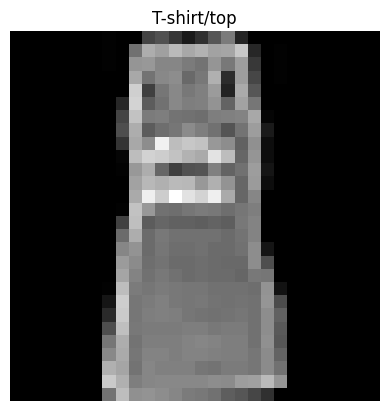

In [11]:
#torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features), size=[1]).item()
img,label=train_features[random_idx], train_labels[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(train_data.classes[label])
plt.axis(False)


### start with baseline mode
model you will try and improve upon with subsequent models/experiments

In [12]:
#create flatten layer
flatten_model=nn.Flatten()

#single sample
x=train_features[0]

#flatten sample
output=flatten_model(x)
print(f"shape before flatten: {x.shape}")
print(f"shape after flatten: {output.shape}")
#instead of data being color channels, height, width -> color channels, height*width
#condence infor into a single vector space

shape before flatten: torch.Size([1, 28, 28])
shape after flatten: torch.Size([1, 784])


why? we want to build a base line linear layer; it can handle single layer as vector not multilayers


In [13]:
from torch import nn
class fashion_model0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)



###equivalent code but manual(instead of using sequential):


    
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layer_1 = nn.Linear(in_features=input_shape, out_features=hidden_units)
        self.layer_2 = nn.Linear(in_features=hidden_units, out_features=output_shape)

    def forward(self, x):
        x = self.flatten(x)
        x = self.layer_1(x)
        x = self.layer_2(x)
        return x


super().__init__()-> registering layers (so model.parameters() can find them)

enabling saving/loading weights

handling .to(device) correctly

managing training/eval modes with .train() and .eval()

In [14]:
torch.manual_seed(42)

model_0=fashion_model0(
    input_shape=784,#28*28
    hidden_units=10,
    output_shape=len(train_data.classes)
).to("cpu")
model_0

fashion_model0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

start_dim=1, end_dim=-1-> Keep dimension 0 (the batch), and flatten everything from dimension 1 to the last one

In [15]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [16]:
#loss and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [17]:
# Install torchmetrics (run once in Colab)
!pip install torchmetrics

# Import the metric
from torchmetrics.classification import MulticlassAccuracy

# Create the accuracy function for 10 classes
acc_fn = MulticlassAccuracy(num_classes=10)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 47.3 MB/s eta 0:00:00


In [18]:
#function to time experiments- how fast it runs

In [19]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time


### steps for training loop
1. loop through epoch
2. loop through training batch
3. loop through testing batches
4. time

In [20]:
#train loop
from tqdm.auto import tqdm

torch.manual_seed(42)
train_start=timer()
epoch=3

for epoch in tqdm(range(epoch)):
  print(f"epoch: {epoch}\n---------")
  train_loss=0

  for batch,(X,y) in enumerate(train_dataloader):
    model_0.train()
    #forward pass
    y_pred=model_0(X)
    #calculate loss
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    #optimizer zero grad
    optimizer.zero_grad()
    #loss backward
    loss.backward()
    #optimizer step
    optimizer.step()
  if batch%400==0:
    print(f"loss at batch {batch}: {loss.item()}")
train_end=timer()
train_loss/=len(train_dataloader)

test_loss,test_acc=0,0
model_0.eval()
with torch.inference_mode():
  for X_test,y_test in test_dataloader:
    test_pred=model_0(X_test)
    test_loss+=loss_fn(test_pred,y_test)
    test_acc+=acc_fn(test_pred.argmax(dim=1),y_test)
  test_loss/=len(test_dataloader)
  test_acc/=len(test_dataloader)
print(f"train loss: {train_loss} | test loss: {test_loss} | test acc:{test_acc}")



print_train_time(train_start,train_end)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
---------
epoch: 1
---------
epoch: 2
---------
train loss: 0.4532497823238373 | test loss: 0.5108762979507446 | test acc:0.8094515800476074
Train time on None: 35.194 seconds


35.19372344199999

In [21]:
#evaluate
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy:torch.nn.Module):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      y_pred=model(X)
      loss+=loss_fn(y_pred,y)
      acc+=accuracy(y_pred.argmax(dim=1),y)
    loss/=len(data_loader)
    acc/=len(data_loader)
  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc.item()}

model_0_results=eval_model(model=model_0,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy=(acc_fn*100))
model_0_results




{'model_name': 'fashion_model0',
 'model_loss': 0.5108762979507446,
 'model_acc': 80.94513702392578}

Creating model with nonlinear function

In [22]:
class fashion_model1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
       # nn.ReLU()
        )

  def forward(self, x):
    return self.layer_stack(x)

In [23]:
torch.manual_seed(42)

model_1=fashion_model1(input_shape=784,
                       hidden_units=10,
                       output_shape=len(train_data.classes))
next(model_1.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       requires_grad=True)

In [24]:
#loss and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(), lr=0.1)


In [25]:
#creating function for eval/test loop
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               acc_fn: torch.nn.Module):
  train_loss,train_acc=0,0
  model.train()
  for batch,(X,y) in enumerate(train_dataloader):
    #forward pass
    y_pred=model(X)
    #calculate loss
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    train_acc+=acc_fn(y_pred.argmax(dim=1),y)
    #optimizer zero grad
    optimizer.zero_grad()
    #loss backward
    loss.backward()
    #optimizer step
    optimizer.step()

    train_loss/=len(train_dataloader)
    train_acc/=len(train_dataloader)
  return {"train_loss":train_loss.item(),
          "train_acc":train_acc.item()*100}




In [26]:
def test_step(model: torch.nn.Module,
              test_dataloader: torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              acc_fn: torch.nn.Module):
  test_loss,test_acc=0,0
  model.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred=model(X_test)
      test_loss+=loss_fn(test_pred,y_test)
      test_acc+=acc_fn(test_pred.argmax(dim=1),y_test)
    test_loss/=len(test_dataloader)
    test_acc/=len(test_dataloader)
  print(f"test loss: {test_loss} | test acc:{test_acc*100}")



In [27]:
torch.manual_seed(42)
epochs=3
for epoch in tqdm(range(epochs)):
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             acc_fn=acc_fn)

  test_step(model=model_1,
            test_dataloader=test_dataloader,
            loss_fn=loss_fn,
            acc_fn=acc_fn)



  0%|          | 0/3 [00:00<?, ?it/s]

test loss: 0.5385502576828003 | test acc:79.95581817626953
test loss: 0.4938967227935791 | test acc:81.17871856689453
test loss: 0.45746350288391113 | test acc:82.60231018066406


In [28]:
model_0_results


{'model_name': 'fashion_model0',
 'model_loss': 0.5108762979507446,
 'model_acc': 80.94513702392578}

In [29]:
model_1_results=eval_model(model=model_1,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy=acc_fn)
model_1_results

{'model_name': 'fashion_model1',
 'model_loss': 0.45746350288391113,
 'model_acc': 0.8260231018066406}

#build cnn-> known for finding patterns in visual data
Instead of connecting every pixel to every neuron (like in a fully connected layer), it uses small filters (kernels) that slide across the image to detect features

In [30]:
from torch import nn
class FasionCnn(nn.Module):
  #TinyVGG-version
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,#dimensions of the sliding window over the input
                  stride=1,#indicates how many pixels the kernel should be shifted over at a time
                  padding=1),#Padding conserves data at the borders of activation maps
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
        )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )

    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,#calculated
                  out_features=output_shape)
        )

  def forward(self,x):
    x=self.conv_block_1(x)
    #print(x.shape)
    x=self.conv_block_2(x)
    #print(x.shape)
    x=self.classifier(x)
    return x




#keep stride same as kernal size(default)






In [31]:
torch.manual_seed(42)
model_2=FasionCnn(input_shape=1,#1 due to 1 color channel
                  hidden_units=10,
                  output_shape=len(train_data.classes)
                  )
model_2


FasionCnn(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [32]:
#set loss and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [33]:
#train
torch.manual_seed(42)

epochs=3
for epoch in tqdm(range(epochs)):
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             acc_fn=acc_fn)
  test_step(model=model_2,
            test_dataloader=test_dataloader,
            loss_fn=loss_fn,
            acc_fn=acc_fn)


  0%|          | 0/3 [00:00<?, ?it/s]

test loss: 0.3950044810771942 | test acc:85.32695007324219
test loss: 0.35244327783584595 | test acc:86.17073059082031
test loss: 0.32718968391418457 | test acc:87.6424560546875


 self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,#calculated
                  out_features=output_shape)
        )
- to calculate in_features you must multiply hidden_units with a value.
to get this value pass a sample image through forward method, final height and width after sample was passed to all conv layers then multiply them to hidden_units

## testing layers individually to understand what their parameters does/controls

In [34]:
#test values in conv layer

test_image=train_features[0].unsqueeze(dim=0)
test_image.shape
conv_layer=nn.Conv2d(in_channels=1,
                     out_channels=10,
                     kernel_size=3,
                     stride=1,
                     padding=1)
conv_output=conv_layer(test_image)
conv_output.shape

torch.Size([1, 10, 28, 28])

In [35]:
#nn.maxpool2d
max_pool_layer=nn.MaxPool2d(kernel_size=2, stride=2)
max_pool_output=max_pool_layer(conv_output)
max_pool_output.shape

torch.Size([1, 10, 14, 14])

MaxPool: slides a window(kernal_size*stride) across each feature map and takes the maximum value from each region compresses data(reduces dimensionality), keeping important features preserved.
- Reduces spatial size → fewer parameters, faster computation

- Keeps strongest signals → retains important features

- Adds some translation invariance → small shifts in image don’t change output much

In [36]:
model_2_results=eval_model(model=model_2,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy=acc_fn)
model_2_results

{'model_name': 'FasionCnn',
 'model_loss': 0.32718968391418457,
 'model_acc': 0.8764245510101318}

In [37]:
#compare results of 3 models
import pandas as pd
compare=pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare

,model_name,model_loss,model_acc
0,fashion_model0,0.510876,80.945137
1,fashion_model1,0.457464,0.826023
2,FasionCnn,0.327190,0.876425


### evaulation metrics can be through:
- makeing predictions through test sample
- plotting
- confusion matrix

### extra notes

What benchmarking does (torch.backends.cudnn.benchmark)

When benchmark=True, PyTorch asks cuDNN to try several algorithms, measure their speed, and pick the fastest one for your specific input shape.

That picked algorithm is cached and reused for the same input sizes later.

This makes training faster, but introduces a subtle issue:

Because of benchmarking noise or hardware variation, the “fastest” algorithm may differ between runs — so your results may vary slightly each time.

That means it’s not deterministic (you lose perfect reproducibility).

Deterministic algorithms:
A deterministic algorithm always gives the same output for the same input

A non-deterministic algorithm can produce slightly different outputs even with the same inputs

torch.use_deterministic_algorithms(True) is a PyTorch setting that forces all operations in your code to use deterministic (reproducible) algorithms — or raise an error if no deterministic version exists.

optimization Algorithms:
- Adadelta
Implements Adadelta algorithm.

- Adafactor
Implements Adafactor algorithm.

- Adagrad
Implements Adagrad algorithm.

- Adam
 Implements Adam algorithm.

- AdamW
Implements AdamW algorithm, where weight decay does not accumulate in the momentum nor variance.

- SparseAdam

SparseAdam implements a masked version of the Adam algorithm suitable for sparse gradients.

- Adamax

Implements Adamax algorithm (a variant of Adam based on infinity norm).

- ASGD

Implements Averaged Stochastic Gradient Descent.

- LBFGS

Implements L-BFGS algorithm.

- Muon

Implements Muon algorithm.

- NAdam

Implements NAdam algorithm.

- RAdam

Implements RAdam algorithm.

- RMSprop

Implements RMSprop algorithm.

- Rprop

Implements the resilient backpropagation algorithm.

- SGD

Implements stochastic gradient descent (optionally with momentum).


Has fused?-> means if all operations are done on the same kernel or not:
All steps are done inside one fused kernel->Faster, more efficient GPU use
false-> Slower, more GPU overhead
